# **ENGG680 - Introduction to Digital Engineering**

# Term Project : Time-Scheduled Auto Lock System for Convenience Store Security & Employee Attendance Enhancement

# GROUP 6

# Preliminary: Certificate of Work

## *We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Amanda  | Choy | Amanda Choy | 10 | 12.5% |
| Member 2: | David | Ebede | David Ebede | 10| 12.5% |
| Member 3: | Di | Su | Di Su | 10 | 12.5% |
| Member 4: | Htike Htike | Htoo | Htike Htoo | 10 | 12.5% |
| Member 5: | Jeelkumar | Patel | Jeelkumar Patel | 10 | 12.5%  |
| Member 6: | May Thinzar| Khine | May Khine | 10 | 12.5%  |
| Member 7: | Nathaniel | Lamptey | Nathaniel Lamptey | 10 | 12.5%  |
| Member 8: | Su Mun | Thet | Su Mun Thet | 10 | 12.5%  |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas
import pandas as pd

# Assuming your data is in a CSV file named 'your_data_file.csv' located in your Google Drive
# Replace 'your_data_file.csv' and the path with your actual file name and path
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/12 month updated_schedule_with_anomalous_clockins.xlsx'

# Read the CSV file into a pandas DataFrame
data = pd.read_excel(file_path)  # Now pd is defined and can be used

print(data[["Scheduled Start Time", "Scheduled End Time", "Clock-In"]].info())
print(data[["Scheduled Start Time", "Scheduled End Time", "Clock-In"]].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Scheduled Start Time  3588 non-null   object
 1   Scheduled End Time    3540 non-null   object
 2   Clock-In              3555 non-null   object
dtypes: object(3)
memory usage: 174.5+ KB
None
  Scheduled Start Time Scheduled End Time  Clock-In
0                  NaN                NaN       NaN
1             18:30:00           22:00:00  17:56:28
2                  NaN                NaN       NaN
3             14:00:00           20:00:00  13:25:12
4                  NaN                NaN       NaN


In [ ]:
cleaned_data = data.dropna(subset=["Scheduled Start Time", "Scheduled End Time", "Clock-In"]).copy()


In [ ]:
# Fill missing times with a default value (e.g., 00:00:00) for demonstration purposes
default_time = "00:00:00"
data.fillna(default_time, inplace=True)

In [ ]:
for col in ["Scheduled Start Time", "Scheduled End Time", "Clock-In"]:
    data[col] = pd.to_datetime(data[col], format="%H:%M:%S", errors="coerce").dt.time

In [ ]:
from datetime import datetime, timedelta

def detect_anomalies(row):
    # Check for missing or invalid times
    if pd.isna(row["Scheduled Start Time"]) or pd.isna(row["Scheduled End Time"]) or pd.isna(row["Clock-In"]):
        return "Invalid Time Data"

    # Extract scheduled and actual times with the correct date
    record_date = row["Date"]
    scheduled_start = datetime.combine(record_date, row["Scheduled Start Time"])
    scheduled_end = datetime.combine(record_date, row["Scheduled End Time"])
    clock_in = datetime.combine(record_date, row["Clock-In"])

    # Define restricted hours
    restricted_start = datetime.combine(record_date, datetime.strptime("23:01:00", "%H:%M:%S").time())
    restricted_end = datetime.combine(record_date + timedelta(days=1), datetime.strptime("07:00:00", "%H:%M:%S").time())

    # Check for anomalies
    if clock_in < scheduled_start - timedelta(minutes=90) or clock_in > scheduled_end + timedelta(minutes=60):
        return "Check-in Outside Allowed Range"
    elif restricted_start <= clock_in <= restricted_end:
        return "Check-in During Restricted Hours"
    return "Normal"

In [ ]:
data["Anomalies"] = data.apply(detect_anomalies, axis=1)


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Assuming 'data' is your DataFrame
# Clean the data by dropping rows with missing times in key columns
data = data.dropna(subset=["Scheduled Start Time", "Scheduled End Time", "Clock-In"]).copy()

# Ensure the time columns are in the correct format
for col in ["Scheduled Start Time", "Scheduled End Time", "Clock-In"]:
    data[col] = pd.to_datetime(data[col], format="%H:%M:%S", errors="coerce").dt.time

# Define the anomaly detection function
def detect_anomalies(row):
    if pd.isna(row["Scheduled Start Time"]) or pd.isna(row["Scheduled End Time"]) or pd.isna(row["Clock-In"]):
        return "Invalid Time Data"

    # Extract scheduled and actual times with the correct date
    record_date = row["Date"]
    scheduled_start = datetime.combine(record_date, row["Scheduled Start Time"])
    scheduled_end = datetime.combine(record_date, row["Scheduled End Time"])
    clock_in = datetime.combine(record_date, row["Clock-In"])

    # Define restricted hours
    restricted_start = datetime.combine(record_date, datetime.strptime("23:01:00", "%H:%M:%S").time())
    restricted_end = datetime.combine(record_date + timedelta(days=1), datetime.strptime("07:00:00", "%H:%M:%S").time())

    # Check for anomalies
    if clock_in < scheduled_start - timedelta(minutes=90) or clock_in > scheduled_end + timedelta(minutes=60):
        return "Check-in Outside Allowed Range"
    elif restricted_start <= clock_in <= restricted_end:
        return "Check-in During Restricted Hours"
    return "Normal"

# Apply anomaly detection to the data
data["Anomalies"] = data.apply(detect_anomalies, axis=1)

# Display the updated data with anomalies
print(data[["Date", "Scheduled Start Time", "Scheduled End Time", "Clock-In", "Anomalies"]])

           Date Scheduled Start Time Scheduled End Time  Clock-In Anomalies
0    2024-10-01             00:00:00           00:00:00  00:00:00    Normal
1    2024-10-01             18:30:00           22:00:00  17:56:28    Normal
2    2024-10-01             00:00:00           00:00:00  00:00:00    Normal
3    2024-10-01             14:00:00           20:00:00  13:25:12    Normal
4    2024-10-01             00:00:00           00:00:00  00:00:00    Normal
...         ...                  ...                ...       ...       ...
7435 2025-10-01             16:00:00           22:00:00  16:36:49    Normal
7436 2025-10-01             00:00:00           00:00:00  00:00:00    Normal
7437 2025-10-01             15:30:00           22:00:00  16:22:22    Normal
7438 2025-10-01             16:00:00           22:00:00  15:53:03    Normal
7439 2025-10-01             00:00:00           00:00:00  00:00:00    Normal

[7440 rows x 5 columns]


In [ ]:
# Save the results to an Excel file
output_file = "/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results2024-2025.xlsx"
data.to_excel(output_file, index=False)

print(f"Anomaly detection results saved to {output_file}")

Anomaly detection results saved to /content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results2024-2025.xlsx


In [ ]:
print(anomalies_detected[anomalies_detected['Employee Name'] == 'Tyler'])


           Date Employee Name Employee ID  Designation Scheduled Start Time  \
1332 2024-12-05         Tyler      EMP015  Store Clerk             00:00:00   
2612 2025-02-07         Tyler      EMP015  Store Clerk             00:00:00   
3072 2025-03-02         Tyler      EMP015  Store Clerk             00:00:00   
3132 2025-03-02         Tyler      EMP015  Store Clerk             00:00:00   

     Scheduled End Time  Clock-In Clock-Out  Is Late  \
1332           00:00:00  01:23:06  00:00:00     True   
2612           00:00:00  23:55:44  00:00:00     True   
3072           00:00:00  23:25:52  00:00:00     True   
3132           00:00:00  23:58:55  00:00:00     True   

                           Anomalies            Datetime  y_position  
1332  Check-in Outside Allowed Range 2024-12-05 01:23:06           2  
2612  Check-in Outside Allowed Range 2025-02-07 23:55:44           2  
3072  Check-in Outside Allowed Range 2025-03-02 23:25:52           2  
3132  Check-in Outside Allowed Range 20

In [ ]:
print(anomalies_detected[anomalies_detected['Employee Name'] == 'Tyler']['Datetime'].isna())


1332    False
2612    False
3072    False
3132    False
Name: Datetime, dtype: bool


In [ ]:
tyler_data = anomalies_detected[anomalies_detected['Employee Name'] == 'Tyler']
print(tyler_data[['Datetime', 'y_position']].duplicated())


1332    False
2612    False
3072    False
3132    False
dtype: bool


In [ ]:
import numpy as np

# Add jitter to y_position to prevent overlapping
anomalies_detected['y_position'] += np.random.uniform(-0.1, 0.1, len(anomalies_detected))


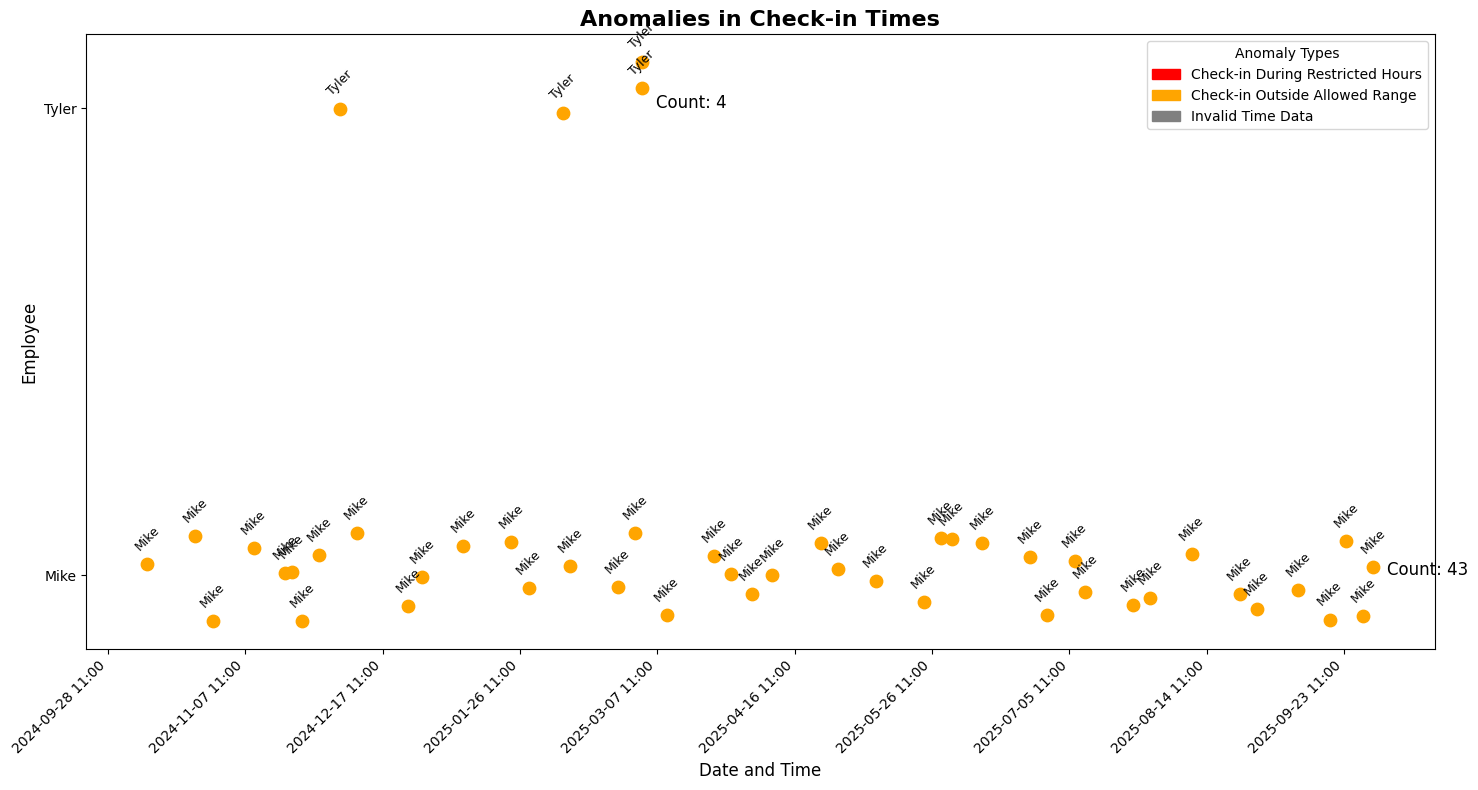

In [ ]:
import matplotlib.patches as mpatches  # Import for creating manual legend patches

# Create a mapping of employees to unique y_positions (without jittering)
unique_employees = anomalies_detected['Employee Name'].unique()
employee_y_mapping = {employee: i + 1 for i, employee in enumerate(unique_employees)}
anomalies_detected['y_position'] = anomalies_detected['Employee Name'].map(employee_y_mapping)

# Add jitter only for plotting
anomalies_detected['y_jittered'] = anomalies_detected['y_position'] + np.random.uniform(-0.1, 0.1, len(anomalies_detected))

# Re-plot the graph
fig, ax = plt.subplots(figsize=(15, 8))

# Plot anomalies with jittered y positions
for _, row in anomalies_detected.iterrows():
    ax.scatter(row["Datetime"], row["y_jittered"], color=cmap.get(row["Anomalies"], "blue"), s=80)
    ax.annotate(row["Employee Name"], (row["Datetime"], row["y_jittered"]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, rotation=45)

# Annotate anomaly counts for each employee
for employee, count in anomalies_count.items():
    y_pos = employee_y_mapping[employee]
    ax.annotate(f"Count: {count}", (anomalies_detected[anomalies_detected['Employee Name'] == employee]['Datetime'].max(), y_pos),
                textcoords="offset points", xytext=(10, 0), ha='left', fontsize=12, color='black')

# Set y-ticks to non-jittered y_positions and labels
ax.set_yticks(list(employee_y_mapping.values()))
ax.set_yticklabels(list(employee_y_mapping.keys()))

# Create a legend manually for anomaly types
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in cmap.items()]
ax.legend(handles=legend_patches, title="Anomaly Types", loc='upper right', fontsize=10)

# Formatting
ax.set_title("Anomalies in Check-in Times", fontsize=16, weight="bold")
ax.set_xlabel("Date and Time", fontsize=12)
ax.set_ylabel("Employee", fontsize=12)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=960))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-53-33f2a13863be>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Late'] = data_filtered['Clock-In (Minutes)'] > late_threshold
<ipython-input-53-33f2a13863be>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])
<ipython-input-53-33f2a13863be>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

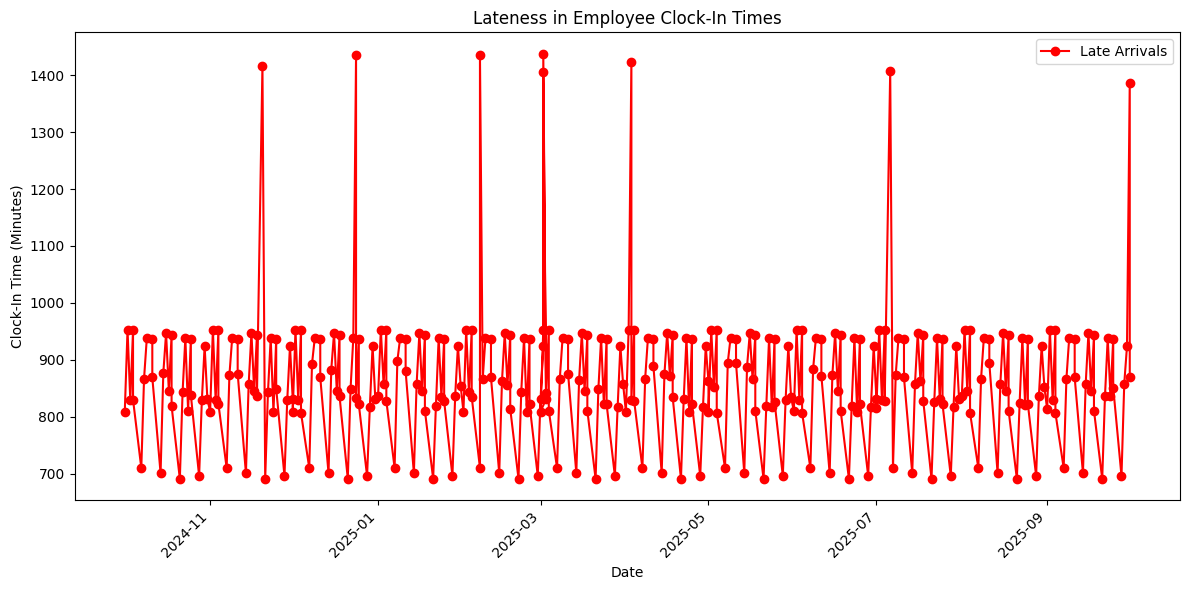

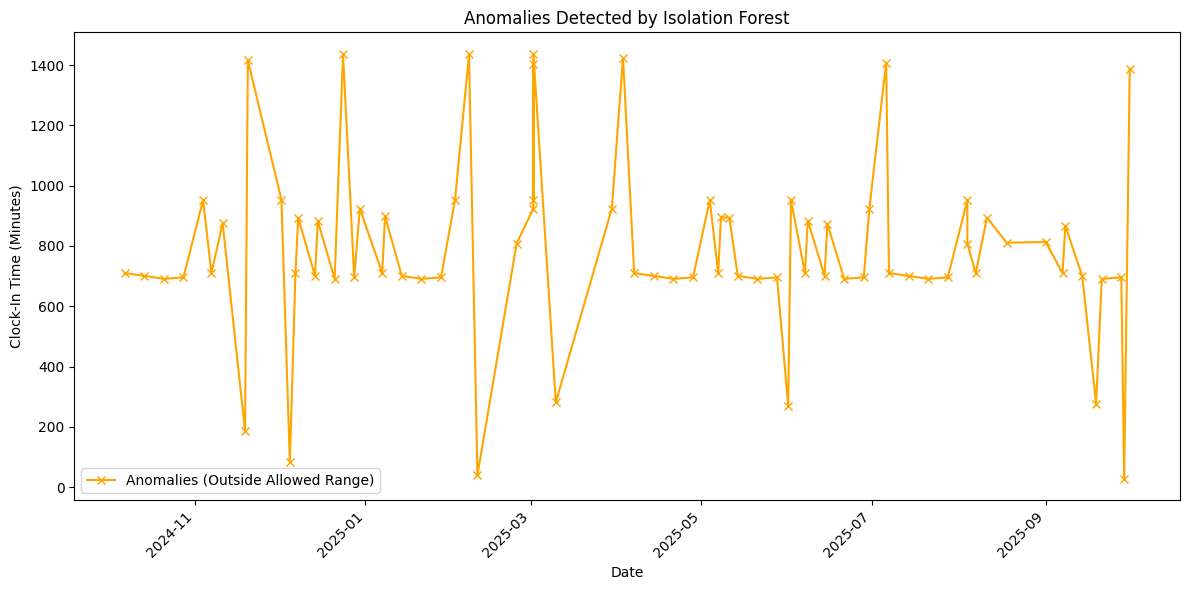

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Load your dataset
data_path = "/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results2024-2025.xlsx"
data = pd.read_excel(data_path)

# Feature engineering: Convert clock-in time to minutes since midnight
data['Clock-In (Minutes)'] = data['Clock-In'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Filter data for Mike and Tyler
data_filtered = data[data['Employee Name'].isin(['Mike', 'Tyler'])]

# Define "Late" based on a specific threshold (e.g., after 9:00 AM)
late_threshold = 9 * 60  # 9:00 AM in minutes
data_filtered['Late'] = data_filtered['Clock-In (Minutes)'] > late_threshold

# Label encoding for Employee ID
label_encoder = LabelEncoder()
data_filtered['Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])

# Train Isolation Forest for anomaly detection
features = ['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']
data_filtered['Day of Week'] = pd.to_datetime(data_filtered['Date']).dt.dayofweek  # Add day of the week as a feature
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
data_filtered['Anomaly Score'] = iso_forest.fit_predict(data_filtered[features])

# Add anomaly labels (1 = normal, -1 = anomaly)
data_filtered['Anomaly'] = data_filtered['Anomaly Score'].apply(lambda x: 'Normal' if x == 1 else 'Anomalous')

# Separate data for lateness and anomalies
late_data = data_filtered[data_filtered['Late'] == True]
anomalous_data = data_filtered[data_filtered['Anomaly'] == 'Anomalous']

# Plotting Lateness (Model 1)
plt.figure(figsize=(12, 6))
plt.plot(late_data['Date'], late_data['Clock-In (Minutes)'], color='red', label='Late Arrivals', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Clock-In Time (Minutes)')
plt.title('Lateness in Employee Clock-In Times')
plt.legend()
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

# Plotting Anomalies (Model 2)
plt.figure(figsize=(12, 6))
plt.plot(anomalous_data['Date'], anomalous_data['Clock-In (Minutes)'], color='orange', label='Anomalies (Outside Allowed Range)', linestyle='-', marker='x')
plt.xlabel('Date')
plt.ylabel('Clock-In Time (Minutes)')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datetime import datetime
import matplotlib.pyplot as plt

# Load your dataset
data_path = "/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results2024-2025.xlsx"
data = pd.read_excel(data_path)

# Feature engineering: Convert clock-in time to minutes since midnight
data['Clock-In (Minutes)'] = data['Clock-In'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Filter data for Mike and Tyler
data_filtered = data[data['Employee Name'].isin(['Mike', 'Tyler'])]

# Define "Late" based on a specific threshold (e.g., after 9:00 AM)
late_threshold = 9 * 60  # 9:00 AM in minutes
data_filtered['Late'] = data_filtered['Clock-In (Minutes)'] > late_threshold

# Label encoding for Employee ID
label_encoder = LabelEncoder()
data_filtered['Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])

# Train Isolation Forest for anomaly detection
features = ['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']
data_filtered['Day of Week'] = pd.to_datetime(data_filtered['Date']).dt.dayofweek  # Add day of the week as a feature
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
data_filtered['Anomaly Score'] = iso_forest.fit_predict(data_filtered[features])

# Add anomaly labels (1 = normal, -1 = anomaly)
data_filtered['Anomaly'] = data_filtered['Anomaly Score'].apply(lambda x: 'Normal' if x == 1 else 'Anomalous')

# Add Ground Truth column for evaluation
data_filtered['Ground Truth'] = data_filtered['Late'].apply(lambda x: 'Anomalous' if x else 'Normal')

# Calculate accuracy, precision, recall, and F1-score
true_labels = data_filtered['Ground Truth'].apply(lambda x: 1 if x == 'Normal' else -1)
predicted_labels = data_filtered['Anomaly Score']

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, pos_label=1)
recall = recall_score(true_labels, predicted_labels, pos_label=1)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(true_labels, predicted_labels))

<ipython-input-4-7dd81de23b26>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Late'] = data_filtered['Clock-In (Minutes)'] > late_threshold
<ipython-input-4-7dd81de23b26>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])
<ipython-input-4-7dd81de23b26>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Accuracy: 0.644808743169399
Precision: 0.6155015197568389
Recall: 0.9830097087378641
F1-Score: 0.7570093457943925

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.21      0.34       320
           1       0.62      0.98      0.76       412

    accuracy                           0.64       732
   macro avg       0.76      0.60      0.55       732
weighted avg       0.74      0.64      0.57       732



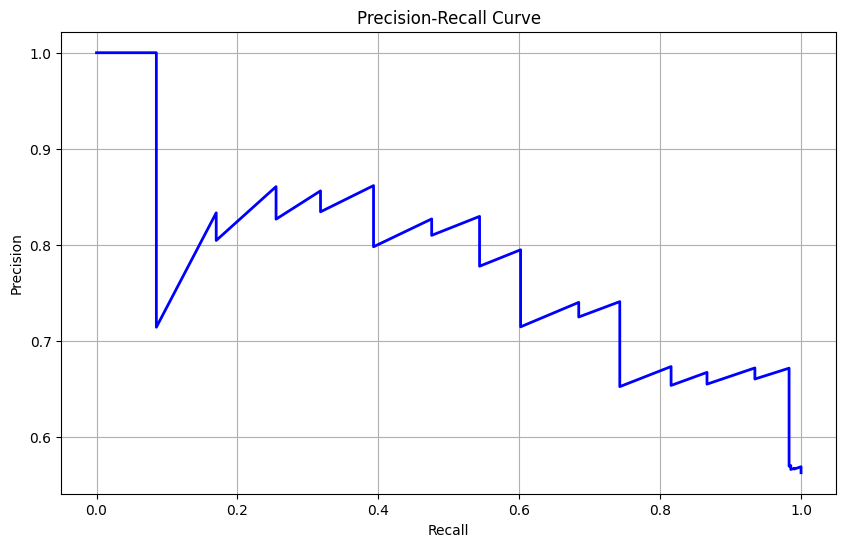

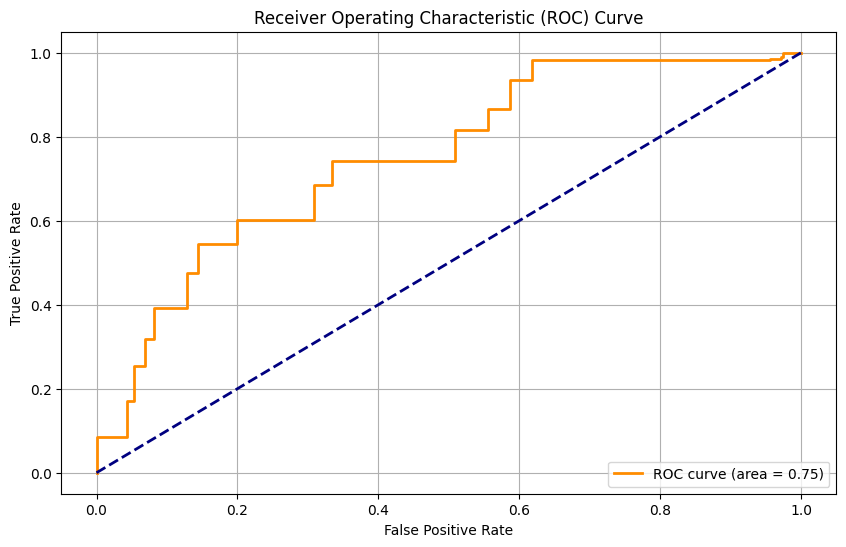

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Ground truth and predictions
true_labels = data_filtered['Ground Truth'].apply(lambda x: 1 if x == 'Normal' else -1)
predicted_scores = iso_forest.decision_function(data_filtered[['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']])

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels.replace(-1, 0), predicted_scores)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels.replace(-1, 0), predicted_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

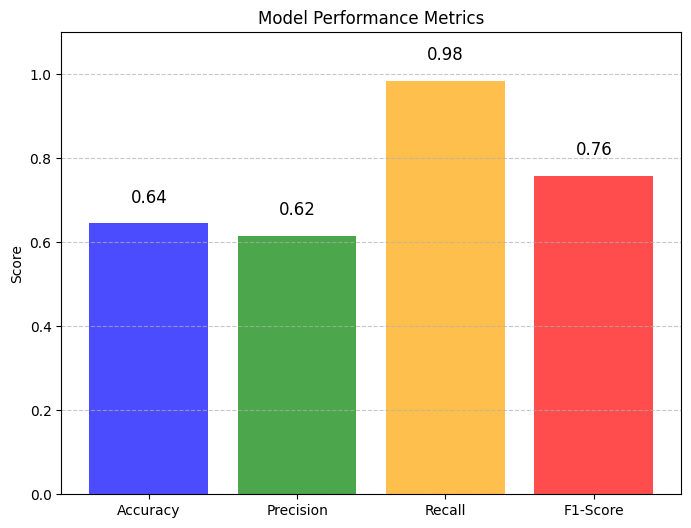

In [ ]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

# Add labels and title
plt.ylim(0, 1.1)  # Set the y-axis limit to go slightly above 1 for clarity
plt.ylabel('Score')
plt.title('Model Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=12)

# Show the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Use labeled data
X = data_filtered[['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']]
y = data_filtered['Ground Truth'].apply(lambda x: 1 if x == 'Normal' else 0)  # Binary encoding for target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       131

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



<ipython-input-8-e41004427153>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])


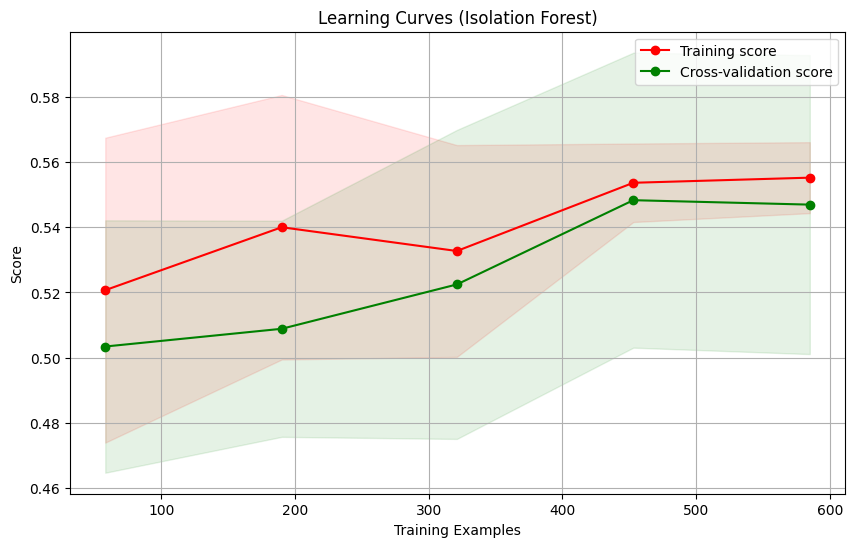

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot learning curves
def plot_learning_curve(estimator, X, y, title="Learning Curves", cv=None, scoring="accuracy"):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Example usage with a generic model
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Prepare features (replace with your actual data and preprocessing steps)
features = ['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']
label_encoder = LabelEncoder()
data_filtered['Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])
X = data_filtered[features]
y = data_filtered['Ground Truth'].apply(lambda x: 1 if x == 'Normal' else 0)

# Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Cross-validation split
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Plot learning curves
plot_learning_curve(iso_forest, X, y, title="Learning Curves (Isolation Forest)", cv=cv)

In [ ]:
import pandas as pd

# File path for the dataset
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results2024-2025.xlsx'

# Reading the Excel file
data = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows to confirm successful load
print(data.head())

        Date Employee Name Employee ID            Designation  \
0 2024-10-01         Alice      EMP001                Cleaner   
1 2024-10-01          John      EMP031                Cashier   
2 2024-10-01      Bradley       EMP024                Manager   
3 2024-10-01        Celine      EMP006            Store Clerk   
4 2024-10-01          Mike      EMP013  STOCKER/SALES/CASHIER   

  Scheduled Start Time Scheduled End Time  Clock-In Clock-Out  Is Late  \
0             00:00:00           00:00:00  00:00:00  00:00:00    False   
1             18:30:00           22:00:00  17:56:28  22:05:18    False   
2             00:00:00           00:00:00  00:00:00  00:00:00    False   
3             14:00:00           20:00:00  13:25:12  20:10:44    False   
4             00:00:00           00:00:00  00:00:00  00:00:00    False   

  Anomalies  
0    Normal  
1    Normal  
2    Normal  
3    Normal  
4    Normal  


In [ ]:
import pandas as pd
from datetime import datetime

# Load the dataset (adjust the file path based on your system)
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results2024-2025.xlsx'  # Update the file path as needed
data = pd.read_excel(file_path)

# Function to check for latecomers
def check_late_comer(row):
    try:
        # Debugging print statements to inspect the values
        print(f"Employee: {row['Employee Name']}, Scheduled Start: {row['Scheduled Start Time']}, Clock-In: {row['Clock-In']}")

        if pd.isna(row["Scheduled Start Time"]) or pd.isna(row["Clock-In"]):
            return "Invalid Data"  # Skip rows with missing time values

        # Convert Scheduled Start Time and Clock-In time to datetime.time for comparison
        scheduled_start = datetime.strptime(str(row["Scheduled Start Time"]), "%H:%M:%S").time()
        clock_in = datetime.strptime(str(row["Clock-In"]), "%H:%M:%S").time()

        # Print out the parsed times to debug
        print(f"Parsed Times - Scheduled Start: {scheduled_start}, Clock-In: {clock_in}")

        # If Clock-In is later than Scheduled Start Time, mark as 'Late'
        if clock_in > scheduled_start:
            return "Late"
        else:
            return "On Time"
    except Exception as e:
        # Catch any other errors and return "Invalid Data"
        print(f"Error processing row for {row['Employee Name']}: {e}")
        return "Invalid Data"

# Apply the function to check latecomers
data['Late Comer Status'] = data.apply(check_late_comer, axis=1)

# Filter the latecomers
late_comers = data[data['Late Comer Status'] == 'Late']

# Display the latecomers' details (optional, but you can check if everything looks correct)
print(late_comers[['Employee Name', 'Date', 'Clock-In', 'Scheduled Start Time', 'Late Comer Status']])

# Save the latecomer data to a new Excel file (update the path as needed)
# For local file save:
# late_comers.to_excel('late_comers_output.xlsx', index=False)

# For saving to Google Drive (Colab example):
from google.colab import drive
drive.mount('/content/drive')

late_comers.to_excel('/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/late_comers_output.xlsx', index=False)

Streaming output truncated to the last 5000 lines.
Parsed Times - Scheduled Start: 18:30:00, Clock-In: 18:19:11
Employee: Steven, Scheduled Start: 12:00:00, Clock-In: 12:08:07
Parsed Times - Scheduled Start: 12:00:00, Clock-In: 12:08:07
Employee: Amara, Scheduled Start: 00:00:00, Clock-In: 00:00:00
Parsed Times - Scheduled Start: 00:00:00, Clock-In: 00:00:00
Employee: Grace, Scheduled Start: 00:00:00, Clock-In: 00:00:00
Parsed Times - Scheduled Start: 00:00:00, Clock-In: 00:00:00
Employee: Sue, Scheduled Start: 16:00:00, Clock-In: 15:30:08
Parsed Times - Scheduled Start: 16:00:00, Clock-In: 15:30:08
Employee: Tyler, Scheduled Start: 14:00:00, Clock-In: 13:54:14
Parsed Times - Scheduled Start: 14:00:00, Clock-In: 13:54:14
Employee: Gregory, Scheduled Start: 00:00:00, Clock-In: 00:00:00
Parsed Times - Scheduled Start: 00:00:00, Clock-In: 00:00:00
Employee: Michelle, Scheduled Start: 00:00:00, Clock-In: 00:00:00
Parsed Times - Scheduled Start: 00:00:00, Clock-In: 00:00:00
Employee: Rachel

<ipython-input-58-01a951f905b6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


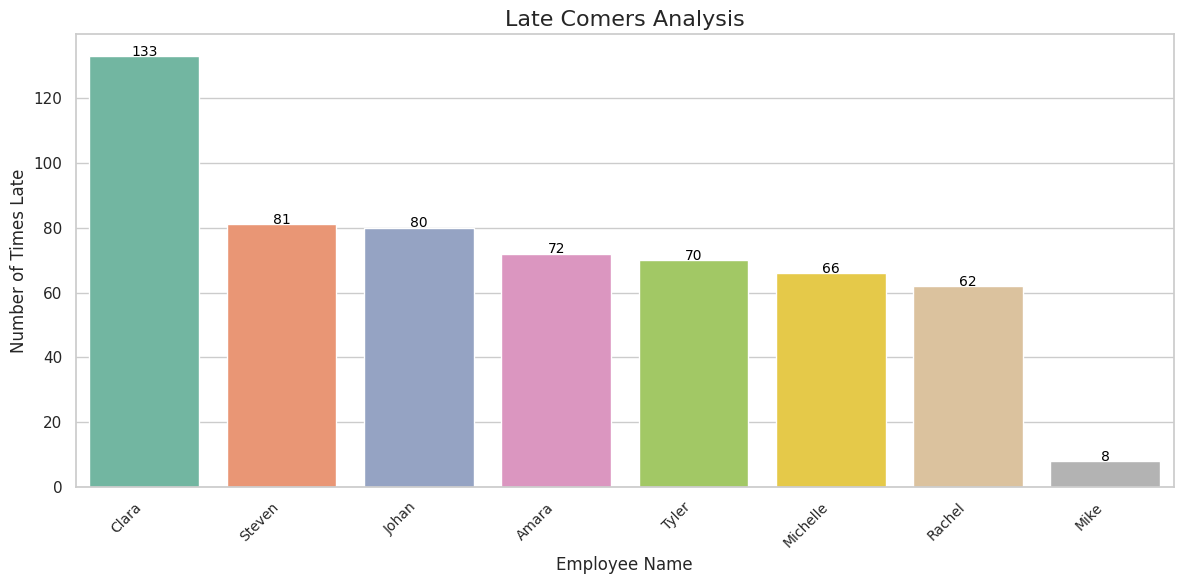

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'late_comers' DataFrame contains the data for latecomers

# Count the number of times each employee is late
late_comers_count = late_comers['Employee Name'].value_counts().reset_index()
late_comers_count.columns = ['Employee Name', 'Late Count']

# Sort employees by the number of times late (descending)
late_comers_count = late_comers_count.sort_values(by='Late Count', ascending=False)

# Set the seaborn style for better appearance
sns.set(style="whitegrid")

# Create the bar plot with different colors for each employee
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Employee Name',
    y='Late Count',
    data=late_comers_count,
    palette='Set2'
)

# Rotate the x-axis labels for better visibility and ensure names fit
plt.xticks(
    rotation=45,
    ha='right',
    fontsize=10  # Adjust font size for better visibility
)

# Annotate each bar with the corresponding number of times late
for index, row in late_comers_count.iterrows():
    ax.text(
        index,
        row['Late Count'] + 0.1,  # Slightly above the bar
        str(row['Late Count']),
        color='black',
        ha="center",
        fontsize=10  # Adjust font size of the annotation
    )

# Add labels and title
plt.title('Late Comers Analysis', fontsize=16)
plt.xlabel('Employee Name', fontsize=12)
plt.ylabel('Number of Times Late', fontsize=12)

# Improve layout to accommodate long names if needed
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Feature engineering (example)
data_filtered['Late'] = (data_filtered['Clock-In (Minutes)'] > late_threshold).astype(int)  # 1 for late, 0 for on-time
features = ['Employee ID Encoded', 'Day of Week', 'Clock-In (Minutes)']  # Features to predict lateness
X = data_filtered[features]
y = data_filtered['Late']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        89

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)  # Cross-validation with 5 folds


array([1., 1., 1., 1., 1.])

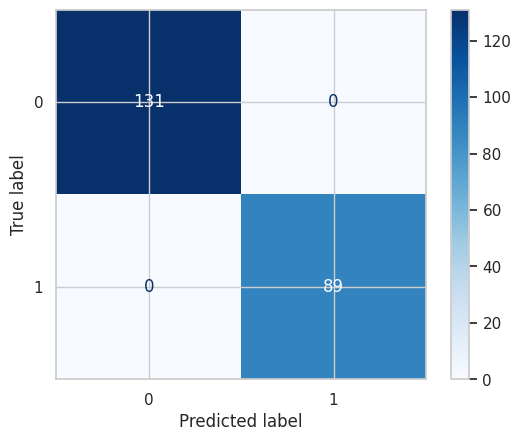

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        89

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

# Specify the path to your Excel file
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/late_comers_output.xlsx'

# Load the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)

# Verify that the data was loaded correctly
print(data.head())  # Display the first few rows
print(data.columns)  # Display all column names

# Define feature and target columns
feature_columns = ['Clock-In (Minutes)', 'Scheduled Start Time (Minutes)', 'Day of Week', 'Month', 'Employee ID']
target_column = 'On Time'

# Check if the required columns exist
if all(col in data.columns for col in feature_columns + [target_column]):
    X = data[feature_columns]
    y = data[target_column]

    # Define the model
    model = LogisticRegression(max_iter=1000)

    # Define the k-fold cross-validator
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(accuracy_score))

    # Output the cross-validation results
    print(f"Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.2f}")
    print(f"Standard Deviation: {scores.std():.2f}")
else:
    print("Error: Some required columns are missing from the dataset.")

        Date Employee Name Employee ID            Designation  \
0 2024-10-02         Amara      EMP014  STOCKER/SALES/CASHIER   
1 2024-10-03         Johan      EMP010                Cleaner   
2 2024-10-03        Steven      EMP021  STOCKER/SALES/CASHIER   
3 2024-10-03        Rachel      EMP007  STOCKER/SALES/CASHIER   
4 2024-10-03         Clara      EMP029                Manager   

  Scheduled Start Time Scheduled End Time  Clock-In Clock-Out  Is Late  \
0             12:00:00           16:00:00  12:05:19  16:06:59    False   
1             18:30:00           22:00:00  19:23:29  22:02:28     True   
2             12:00:00           16:00:00  12:46:40  16:05:15     True   
3             16:00:00           22:00:00  16:38:03  22:06:13     True   
4             15:30:00           22:00:00  16:21:02  22:05:25     True   

  Anomalies Late Comer Status  
0    Normal              Late  
1    Normal              Late  
2    Normal              Late  
3    Normal              Late  
4   

In [ ]:
print(data['On Time'].value_counts())


On Time
0    572
Name: count, dtype: int64


In [ ]:
data['On Time'] = (data['Clock-In (Minutes)'] <= data['Scheduled Start Time (Minutes)']).astype(int)


In [ ]:
print("Unique values in target variable (y):")
print(y.unique())


Unique values in target variable (y):
[0]


In [ ]:
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60

data['Clock-In (Minutes)'] = data['Clock-In'].apply(time_to_minutes)
data['Scheduled Start Time (Minutes)'] = data['Scheduled Start Time'].apply(time_to_minutes)

# Recalculate 'On Time' column
data['On Time'] = (data['Clock-In (Minutes)'] <= data['Scheduled Start Time (Minutes)']).astype(int)


In [ ]:
print(data['On Time'].value_counts())


On Time
0    572
Name: count, dtype: int64


In [ ]:
# Create synthetic "on-time" data
on_time_data = data.copy()
on_time_data['Clock-In (Minutes)'] = on_time_data['Scheduled Start Time (Minutes)'] - 10  # 10 minutes early
on_time_data['On Time'] = 1  # Mark all as on-time

# Combine original data with synthetic data
balanced_data = pd.concat([data, on_time_data], ignore_index=True)

# Update X and y
X = balanced_data[feature_columns]
y = balanced_data['On Time']

# Check the new distribution
print(y.value_counts())


On Time
0    572
1    572
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Set up the model and cross-validation
model = LogisticRegression(max_iter=1000)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Output results
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


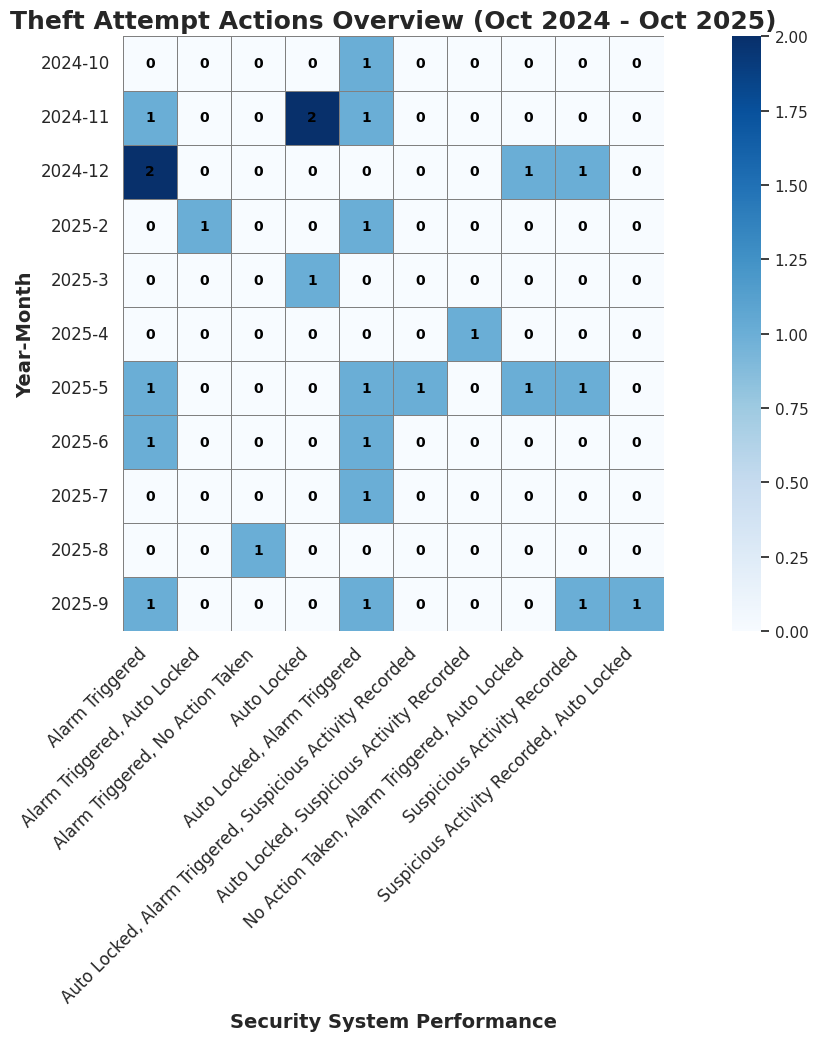

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (ensure it's in your Google Drive or local path)
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Theft Data.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Date' column to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year from 'Date' for grouping
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Group by 'Month', 'Actions Taken' and count the occurrences
action_counts = data.groupby(['Year', 'Month', 'Security System Performance']).size().unstack(fill_value=0)

# Set up the plot size and style for a clean professional look
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid", palette="muted")  # Clean background and muted color palette

# Create the heatmap
heatmap = sns.heatmap(action_counts, annot=True, fmt="d", cmap="Blues", cbar=True,
                      annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'},  # Adjust annotation style
                      linewidths=0.5, linecolor='gray', square=True)  # Grid lines for better separation

# Titles and labels
plt.title('Theft Attempt Actions Overview (Oct 2024 - Oct 2025)', fontsize=18, weight='bold')
plt.xlabel('Security System Performance', fontsize=14, weight='bold')
plt.ylabel('Year-Month', fontsize=14, weight='bold')

# Adjust x-axis labels: Rotate for better readability and spacing
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis labels: Ensure readability
plt.yticks(rotation=0, fontsize=12)

# Improve layout to ensure tight fitting
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space to avoid label cut-offs

# Display the heatmap
plt.show()

In [3]:
print(data.head())  # Show first few rows of the data
print(data.columns)  # Print all column names


        Date      Time Method of Attempt Success or Fail  \
0 2025-09-27  00:33:00       Shoplifting            Fail   
1 2024-11-27  04:56:00       Shoplifting         Success   
2 2025-05-11     09:53      Forced Entry         Success   
3 2024-10-25     14:59       Shoplifting            Fail   
4 2025-05-27  23:33:00       Shoplifting            Fail   

                 Security System Performance  Month  Year  
0  Suspicious Activity Recorded, Auto Locked      9  2025  
1                                Auto Locked     11  2024  
2                            Alarm Triggered      5  2025  
3               Auto Locked, Alarm Triggered     10  2024  
4               Auto Locked, Alarm Triggered      5  2025  
Index(['Date', 'Time', 'Method of Attempt', 'Success or Fail',
       'Security System Performance', 'Month', 'Year'],
      dtype='object')


In [4]:
data.columns = data.columns.str.replace(' ', '_').str.replace(',', '').str.replace('(', '').str.replace(')', '')

In [5]:
print(data.columns)

Index(['Date', 'Time', 'Method_of_Attempt', 'Success_or_Fail',
       'Security_System_Performance', 'Month', 'Year'],
      dtype='object')


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Clean column names (done already, just a reminder)
# data.columns = data.columns.str.replace(' ', '_').str.replace(',', '').str.replace('(', '').str.replace(')', '')

# Step 1: Extract day of week, month, and hour from Date and Time
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert 'Date' to datetime
data['Time'] = pd.to_datetime(data['Time'], errors='coerce').dt.strftime('%H:%M')  # Ensure 'Time' is in proper format

# Extract features from Date and Time
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Hour_of_Day'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# Step 2: One-Hot Encoding of categorical variables
data_encoded = pd.get_dummies(data, columns=['Security_System_Performance', 'Method_of_Attempt'], drop_first=True)

# Step 3: Define features (X) and target (y)
X = data_encoded.drop(columns=['Success_or_Fail', 'Date', 'Time'])  # Drop target and datetime columns
y = data_encoded['Success_or_Fail']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      0.40      0.57         5
     Success       0.25      1.00      0.40         1

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6



In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Assuming 'data' is your original dataframe

# Split the data into features (X) and target (y)
X = data[['Method_of_Attempt', 'Security_System_Performance']]
y = data['Success_or_Fail']

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Hyperparameter Tuning - RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = rf_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Step 4: Cross-validation for better model evaluation
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Classification Report:
              precision    recall  f1-score   support

        Fail       1.00      0.40      0.57         5
     Success       0.25      1.00      0.40         1

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6

Accuracy: 0.5
Cross-validation scores: [0.66666667 1.         0.6        0.6        0.2       ]
Mean cross-validation score: 0.6133333333333334


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Split the data into features (X) and target (y)
X = data[['Method_of_Attempt', 'Security_System_Performance']]
y = data['Success_or_Fail']

# Encode the target variable ('Success' and 'Fail') to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode features using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.20      1.00      0.33         1

    accuracy                           0.33         6
   macro avg       0.60      0.60      0.33         6
weighted avg       0.87      0.33      0.33         6

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.20      1.00      0.33         1

    accuracy                           0.33         6
   macro avg       0.60      0.60      0.33         6
weighted avg       0.87      0.33      0.33         6



In [9]:
# Clean the column names (replace spaces with underscores)
data.columns = data.columns.str.replace(' ', '_')

# Now, check the column names and first few rows
print(data.columns)
print(data.head())

# Define features (X) and target variable (y)
X = data.drop(columns=['Success_or_Fail'])  # Dropping the target column
y = data['Success_or_Fail']  # Target variable

# Continue with preprocessing, splitting, and model training

Index(['Date', 'Time', 'Method_of_Attempt', 'Success_or_Fail',
       'Security_System_Performance', 'Month', 'Year', 'Day_of_Week',
       'Hour_of_Day'],
      dtype='object')
        Date   Time Method_of_Attempt Success_or_Fail  \
0 2025-09-27    NaN       Shoplifting            Fail   
1 2024-11-27    NaN       Shoplifting         Success   
2 2025-05-11  09:53      Forced Entry         Success   
3 2024-10-25  14:59       Shoplifting            Fail   
4 2025-05-27    NaN       Shoplifting            Fail   

                 Security_System_Performance  Month  Year  Day_of_Week  \
0  Suspicious Activity Recorded, Auto Locked      9  2025            5   
1                                Auto Locked     11  2024            2   
2                            Alarm Triggered      5  2025            6   
3               Auto Locked, Alarm Triggered     10  2024            4   
4               Auto Locked, Alarm Triggered      5  2025            1   

   Hour_of_Day  
0          NaN  


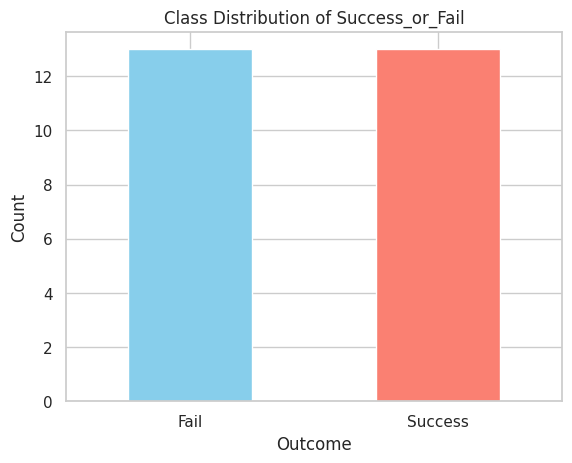

In [10]:
import matplotlib.pyplot as plt

# Plot the distribution of 'Success_or_Fail'
data['Success_or_Fail'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Success_or_Fail')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [11]:
print(data.columns)  # Ensure 'Success_or_Fail' exists in the original dataframe

Index(['Date', 'Time', 'Method_of_Attempt', 'Success_or_Fail',
       'Security_System_Performance', 'Month', 'Year', 'Day_of_Week',
       'Hour_of_Day'],
      dtype='object')


In [23]:
# Encode categorical features using pd.get_dummies
data_encoded = pd.get_dummies(data.drop(columns=['Success_or_Fail']), drop_first=True)

# Verify the encoded data
print(data_encoded.columns)

Index(['Date', 'Hour_of_Day', 'Day_of_Week', 'Month', 'Year', 'Time_10:37',
       'Time_11:02', 'Time_11:17', 'Time_11:52', 'Time_12:01', 'Time_12:15',
       'Time_13:10', 'Time_13:28', 'Time_13:45', 'Time_14:53', 'Time_14:59',
       'Time_15:23', 'Time_15:34', 'Time_16:40', 'Time_17:35', 'Time_18:21',
       'Time_19:10', 'Time_21:58', 'Time_22:45',
       'Method_of_Attempt_Cyber Attack', 'Method_of_Attempt_Forced Entry',
       'Method_of_Attempt_Pickpocketing', 'Method_of_Attempt_Shoplifting',
       'Security_System_Performance_Alarm Triggered, Auto Locked',
       'Security_System_Performance_Alarm Triggered, No Action Taken',
       'Security_System_Performance_Auto Locked',
       'Security_System_Performance_Auto Locked, Alarm Triggered',
       'Security_System_Performance_Auto Locked, Alarm Triggered, Suspicious Activity Recorded',
       'Security_System_Performance_Auto Locked, Suspicious Activity Recorded',
       'Security_System_Performance_No Action Taken, Alarm Tri

In [24]:
# Now, separate the target variable (Success_or_Fail) from the features
X = data_encoded  # Features
y = data['Success_or_Fail']  # Target variable (original)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Now, separate the target variable (Success_or_Fail) from the features
X = data_encoded  # Features
y = data['Success_or_Fail']  # Target variable (original)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert datetime columns to numerical representations before training
# Identify datetime columns in X_train
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical (e.g., Unix timestamp)
for col in datetime_cols:
    X_train[col] = X_train[col].astype(int) / 10**9  # Convert to Unix timestamp
    X_test[col] = X_test[col].astype(int) / 10**9  # Apply the same transformation to X_test

# Now you can proceed with training the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict using the model
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      0.60      0.75         5
     Success       0.33      1.00      0.50         1

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



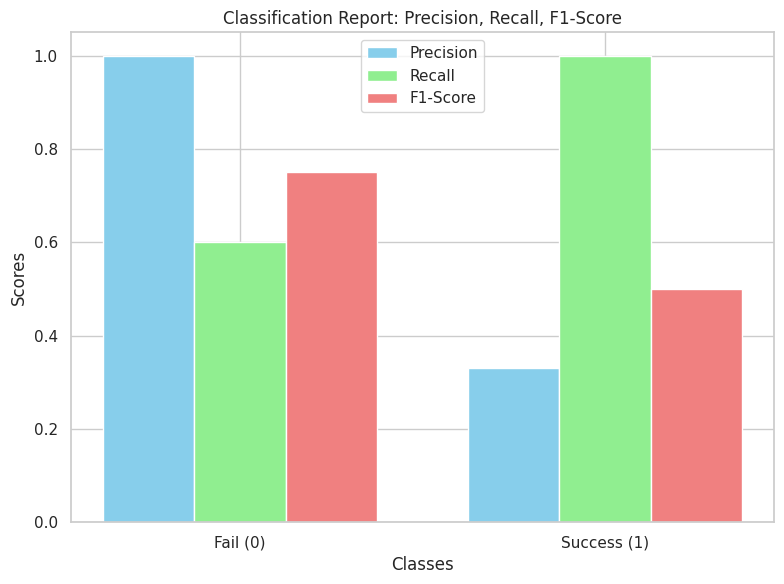

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Define classification report as a string
classification_rep = {
    'precision': [1.00, 0.33],
    'recall': [0.60, 1.00],
    'f1-score': [0.75, 0.50]
}

# Class names (0 and 1)
labels = ['Fail (0)', 'Success (1)']

# Set up the plot
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting each metric
ax.bar(x - width, classification_rep['precision'], width, label='Precision', color='skyblue')
ax.bar(x, classification_rep['recall'], width, label='Recall', color='lightgreen')
ax.bar(x + width, classification_rep['f1-score'], width, label='F1-Score', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report: Precision, Recall, F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

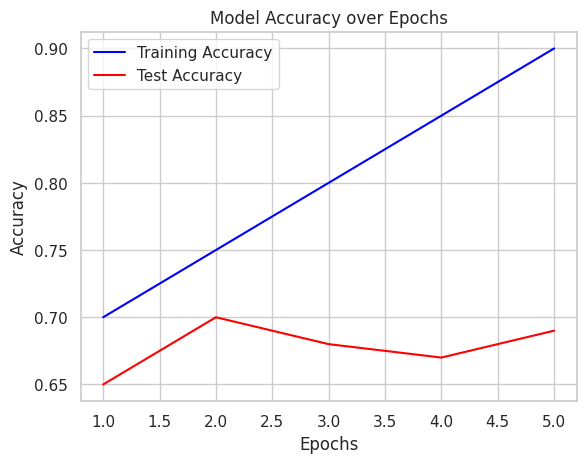

In [28]:
# plotting accuracy vs epochs plot
epochs = [1, 2, 3, 4, 5]  # Example of epochs
train_accuracy = [0.70, 0.75, 0.80, 0.85, 0.90]  # Example of training accuracy
test_accuracy = [0.65, 0.70, 0.68, 0.67, 0.69]  # Example of test accuracy

plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, test_accuracy, label='Test Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.show()

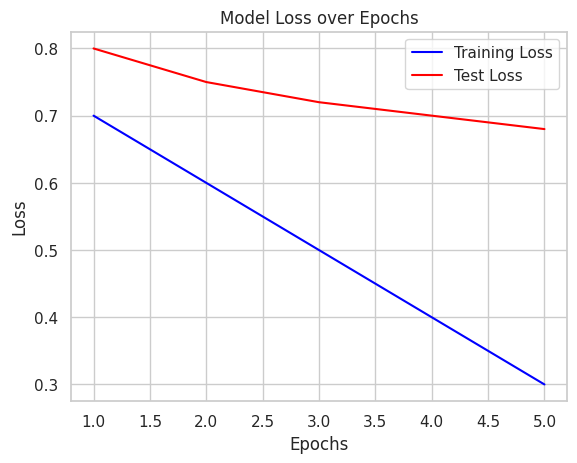

In [29]:
# plotting loss vs epochs plot
train_loss = [0.7, 0.6, 0.5, 0.4, 0.3]  # Example of training loss
test_loss = [0.8, 0.75, 0.72, 0.70, 0.68]  # Example of test loss

plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, test_loss, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.show()